In [1]:
pip install kaggle


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline


In [3]:
data = pd.read_csv('/Users/estherdokumensah/Downloads/dataset')

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Exploratory Data Analysis

In [7]:
df = data.drop(['Email','Address','Avatar'],axis = 1)

In [8]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


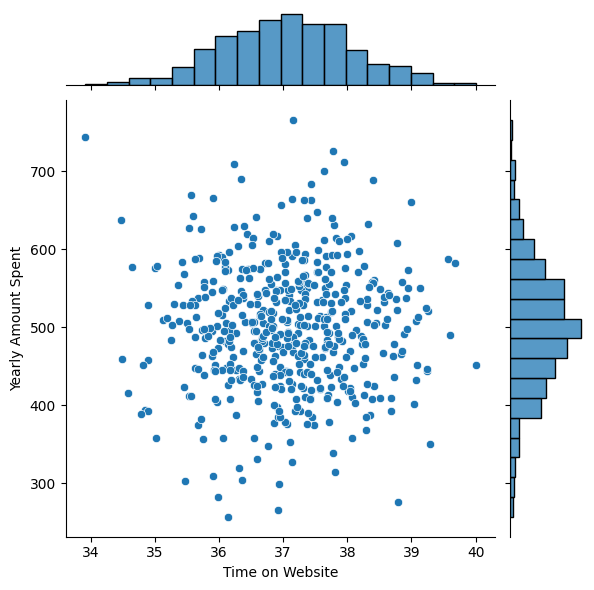

In [9]:
## Finding the relationship between various features 
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data)

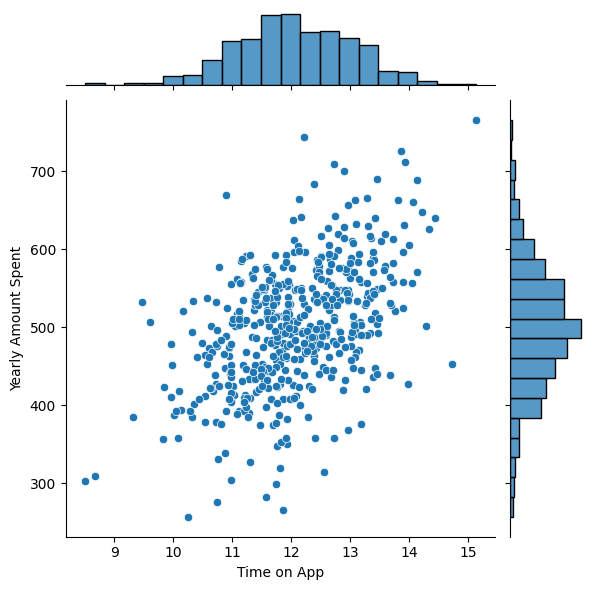

In [10]:
sns.jointplot(x='Time on App',y ='Yearly Amount Spent', data = data)

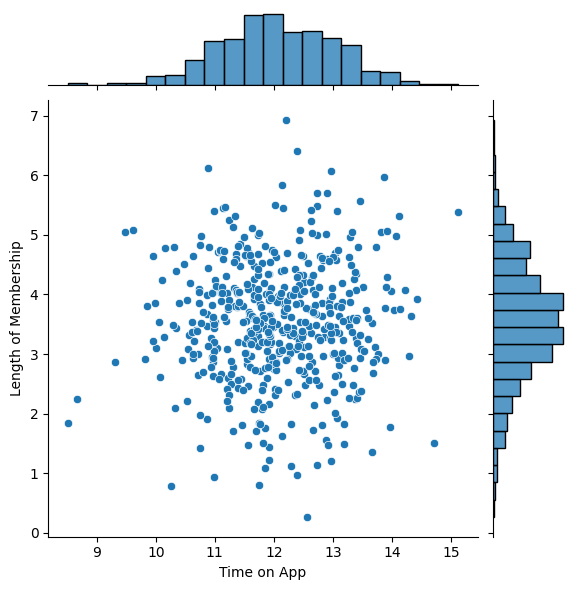

In [11]:
sns.jointplot(x='Time on App',y ='Length of Membership', data = data)

In [13]:
#sns.pairplot(data)

In [15]:
X = df.drop(['Yearly Amount Spent'],axis=1)
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [18]:
y = df['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

Training a model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
model.predict(X_test)

array([404.06761931, 542.58543915, 427.34884845, 502.01838314,
       410.35387455, 570.14352891, 531.69439011, 506.4153722 ,
       408.83196   , 474.12903721, 441.50786945, 425.45910683,
       424.84960856, 527.53136825, 431.6425744 , 423.92828051,
       575.6410409 , 484.73340599, 458.35243842, 481.9994255 ,
       502.40783501, 513.59275338, 507.64303265, 646.71466263,
       450.15917216, 496.02835857, 556.71117274, 554.80328606,
       399.72095803, 325.76634679, 532.8258322 , 478.35148034,
       501.03271062, 305.86614259, 505.83741675, 483.59293742,
       518.59138796, 438.02611651, 456.84385698, 471.12631075,
       494.313675  , 445.2910313 , 508.67100369, 501.06703765,
       489.09955115, 535.25419531, 595.6163079 , 514.06994076,
       281.0370341 , 433.3312853 , 421.91863125, 481.31913532,
       585.10195861, 609.08958222, 563.90795721, 494.43132948,
       394.44374151, 456.49301055, 572.86935519, 499.97874882,
       512.92534141, 392.06155543, 480.2142907 , 481.54

Predicting with Test data

In [28]:
test_predictions = model.predict(X_test)

In [29]:
test_predictions

array([404.06761931, 542.58543915, 427.34884845, 502.01838314,
       410.35387455, 570.14352891, 531.69439011, 506.4153722 ,
       408.83196   , 474.12903721, 441.50786945, 425.45910683,
       424.84960856, 527.53136825, 431.6425744 , 423.92828051,
       575.6410409 , 484.73340599, 458.35243842, 481.9994255 ,
       502.40783501, 513.59275338, 507.64303265, 646.71466263,
       450.15917216, 496.02835857, 556.71117274, 554.80328606,
       399.72095803, 325.76634679, 532.8258322 , 478.35148034,
       501.03271062, 305.86614259, 505.83741675, 483.59293742,
       518.59138796, 438.02611651, 456.84385698, 471.12631075,
       494.313675  , 445.2910313 , 508.67100369, 501.06703765,
       489.09955115, 535.25419531, 595.6163079 , 514.06994076,
       281.0370341 , 433.3312853 , 421.91863125, 481.31913532,
       585.10195861, 609.08958222, 563.90795721, 494.43132948,
       394.44374151, 456.49301055, 572.86935519, 499.97874882,
       512.92534141, 392.06155543, 480.2142907 , 481.54

In [50]:
mymodel = LinearRegression()

In [51]:
mymodel.fit(X,y)

LinearRegression()

In [52]:
##finding the coefficient
mymodel.coef_

array([25.73427108, 38.70915381,  0.43673884, 61.57732375])

Text(0.5, 0, 'Y test')

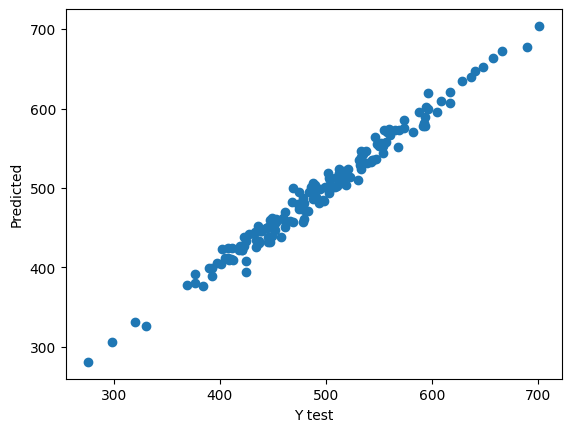

In [47]:
plt.pyplot.scatter(y_test,test_predictions)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Y test')

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [32]:
df['Yearly Amount Spent'].mean()

499.31403825859053

In [49]:
#sns.histplot(data=df,x='Yearly Amount Spent',bins= 20)#general distribution

Evaluating Model

In [35]:
mean_absolute_error(y_test,test_predictions)

8.353573525017561

In [39]:
mean_squared_error(y_test,test_predictions)

102.40428659931901

In [40]:
#RSME
np.sqrt(mean_squared_error(y_test,test_predictions))

10.119500313717028

In [41]:
mymodel = LinearRegression()

In [42]:
mymodel.fit(X,y)

LinearRegression()

Evaluating with residuals

In [53]:
test_residuals = y_test - test_predictions
test_residuals

361    -3.034484
73     -7.808251
374    -8.746106
155     1.959996
104    -0.284263
         ...    
110    -2.934542
318    -8.307056
428    -2.132920
29    -17.768476
437    -5.381402
Name: Yearly Amount Spent, Length: 165, dtype: float64

AttributeError: module 'matplotlib' has no attribute 'axhline'

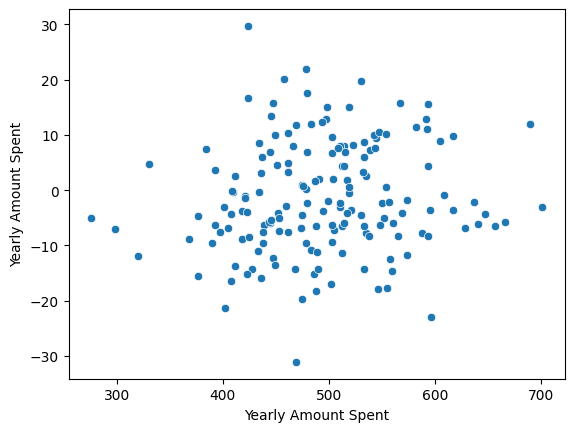

In [54]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls='--')

/var/folders/m7/7q63s15n6sx073k5vybz9_8h0000gp/T/ipykernel_3121/2775308923.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((test_residuals))


<AxesSubplot: xlabel='Yearly Amount Spent', ylabel='Density'>

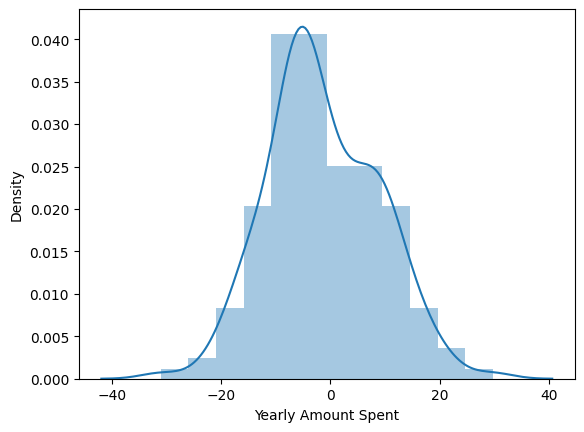

In [55]:
sns.distplot((test_residuals))

Answering the question,do we focus our effort on mobile app or website development?

In [56]:
pd.DataFrame(mymodel.coef_, X.columns, columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,25.734271
Time on App,38.709154
Time on Website,0.436739
Length of Membership,61.577324


Interpreting Coefficients
With Time on App having the highest coeffiecient, it means its impact on yaerly amount spent is higher as compared to Time om website.
With the results above, the company should focus more on the mobile apps.
